In [115]:
!pip install tensorflow opencv-python matplotlib

In [116]:
import tensorflow as tf
import os

In [117]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [118]:
tf.config.list_physical_devices('GPU')

[]

### 1.2 Remove dodgy images

In [125]:
import cv2
import imghdr

In [126]:
import os

# Specify the corrected directory path
data_dir = r'C:\Users\anura\Downloads\images'

# List the contents of the directory
try:
    files = os.listdir(data_dir)
    print(files)
except OSError as e:
    print(f"Error: {e}")


['happyy', 'sadd']


In [127]:
os.listdir(data_dir)

['happyy', 'sadd']

In [128]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [129]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [130]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list C:\Users\anura\Downloads\images\happyy\how-to-watch-shiny-happy-people-64a2f8ea7dc3014582658-900.webp
Image not in ext list C:\Users\anura\Downloads\images\sadd\depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list C:\Users\anura\Downloads\images\sadd\depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg
Image not in ext list C:\Users\anura\Downloads\images\sadd\depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list C:\Users\anura\Downloads\images\sadd\Sad-People.jpg.webp


### 1.3 Load Data

In [131]:
import numpy as np
from matplotlib import pyplot as plt

In [132]:
data = tf.keras.utils.image_dataset_from_directory('C:\\Users\\anura\\Downloads\\Images')

Found 161 files belonging to 2 classes.


In [133]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [134]:
batch = data_iterator.next()

In [135]:
batch

(array([[[[ 49.       , 102.       , 134.       ],
          [ 49.       , 102.       , 134.       ],
          [ 49.       , 102.       , 134.       ],
          ...,
          [152.       , 194.       , 216.       ],
          [152.       , 194.       , 216.       ],
          [152.       , 194.       , 216.       ]],
 
         [[ 49.       , 102.       , 134.       ],
          [ 49.       , 102.       , 134.       ],
          [ 49.       , 102.       , 134.       ],
          ...,
          [152.       , 194.       , 216.       ],
          [152.       , 194.       , 216.       ],
          [152.       , 194.       , 216.       ]],
 
         [[ 49.       , 102.       , 134.       ],
          [ 49.       , 102.       , 134.       ],
          [ 49.       , 102.       , 134.       ],
          ...,
          [152.       , 194.       , 216.       ],
          [152.       , 194.       , 216.       ],
          [152.       , 194.       , 216.       ]],
 
         ...,
 
         [[1

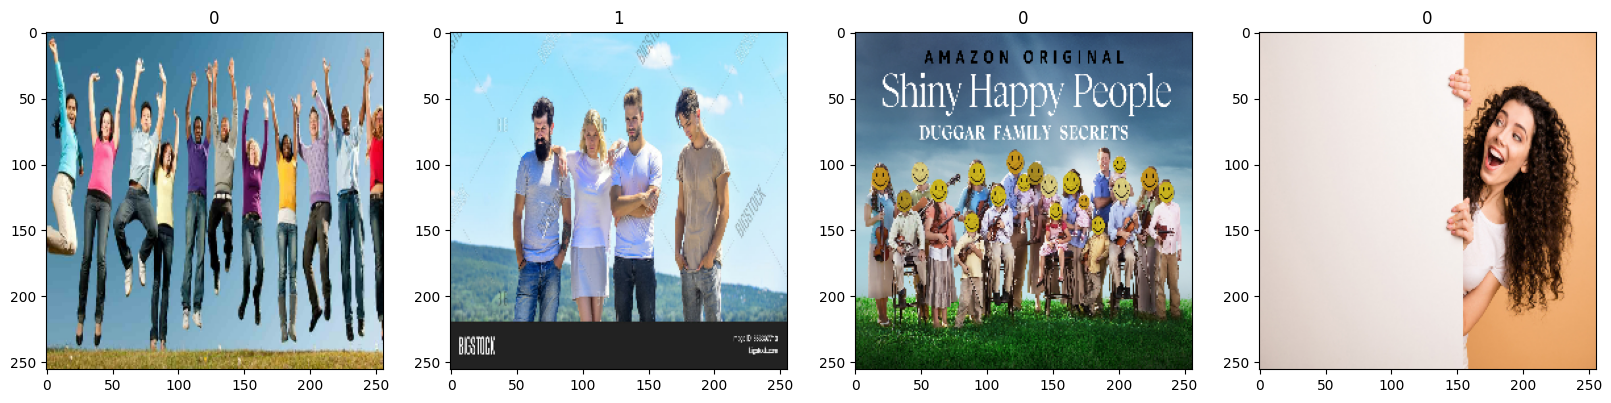

In [136]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Preprocess Data

### 2.1 Scale Data

In [137]:
data = data.map(lambda x,y: (x/255, y))

In [138]:
data.as_numpy_iterator().next()

(array([[[[9.9607843e-01, 9.9607843e-01, 9.9607843e-01],
          [9.9607843e-01, 9.9607843e-01, 9.9607843e-01],
          [9.9730390e-01, 9.9730390e-01, 9.9730390e-01],
          ...,
          [9.9877453e-01, 9.9877453e-01, 9.9877453e-01],
          [8.8848037e-01, 8.8848037e-01, 8.8848037e-01],
          [8.7009805e-01, 8.7009805e-01, 8.7009805e-01]],
 
         [[9.9607843e-01, 9.9607843e-01, 9.9607843e-01],
          [9.9607843e-01, 9.9607843e-01, 9.9607843e-01],
          [9.9730390e-01, 9.9730390e-01, 9.9730390e-01],
          ...,
          [9.9877453e-01, 9.9877453e-01, 9.9877453e-01],
          [8.8848037e-01, 8.8848037e-01, 8.8848037e-01],
          [8.7009805e-01, 8.7009805e-01, 8.7009805e-01]],
 
         [[1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [9.9887264e-01, 9.9887264e-01, 9.9887264e-01],
          ...,
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [8.7994218e-01, 8.7994218e-

### 2.2 Split Data

In [139]:
len(data)

6

In [140]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [141]:
train_size+val_size+test_size

6

In [142]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [143]:
len(test)

1

## 3. Deep Learning Model

### 3.1 Build Deep Learning Model

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [145]:
model = Sequential()

In [146]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [147]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [148]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

### 3.2 Train the Model 

In [149]:
import tensorflow as tf

# Specify the directory path for TensorBoard logs
logdir = r'C:\Users\anura\Downloads\log'

# Create a TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
3/3 [==============================] - 15s 3s/step - loss: 1.0154 - accuracy: 0.4062 - val_loss: 0.6601 - val_accuracy: 0.5781
Epoch 2/20
3/3 [==============================] - 10s 3s/step - loss: 0.7904 - accuracy: 0.4583 - val_loss: 0.6302 - val_accuracy: 0.5625
Epoch 3/20
3/3 [==============================] - 10s 3s/step - loss: 0.6624 - accuracy: 0.5521 - val_loss: 0.6547 - val_accuracy: 0.8281
Epoch 4/20
3/3 [==============================] - 10s 3s/step - loss: 0.6550 - accuracy: 0.8542 - val_loss: 0.6285 - val_accuracy: 0.8906
Epoch 5/20
3/3 [==============================] - 9s 3s/step - loss: 0.6120 - accuracy: 0.7292 - val_loss: 0.5382 - val_accuracy: 0.7344
Epoch 6/20
3/3 [==============================] - 9s 3s/step - loss: 0.5502 - accuracy: 0.7604 - val_loss: 0.4801 - val_accuracy: 0.7969
Epoch 7/20
3/3 [==============================] - 10s 3s/step - loss: 0.4172 - accuracy: 0.8438 - val_loss: 0.3883 - val_accuracy: 0.8594
Epoch 8/20
3/3 [====================

### 3.3 Performance Plot

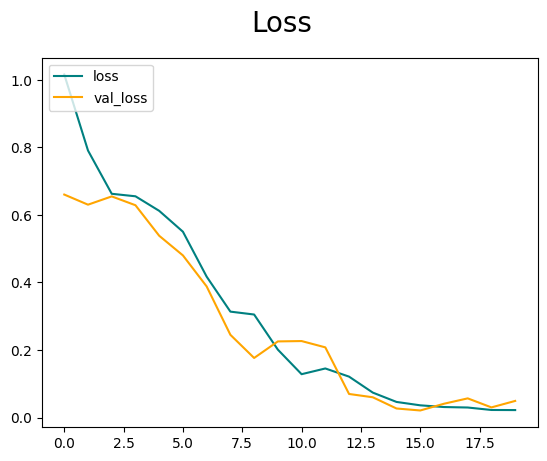

In [152]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

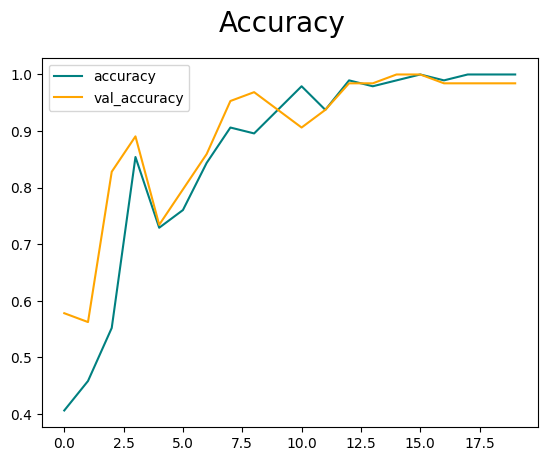

In [153]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 4. Evaluate Performance

In [154]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [155]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [156]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 342ms/step


In [157]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## 5. Test

In [158]:
import cv2

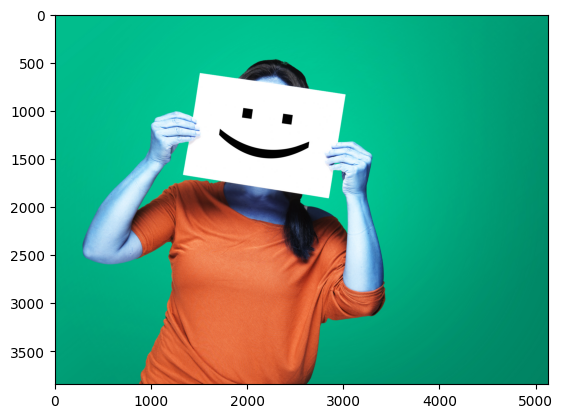

In [163]:
img = cv2.imread('woman.jpg')
plt.imshow(img)
plt.show()

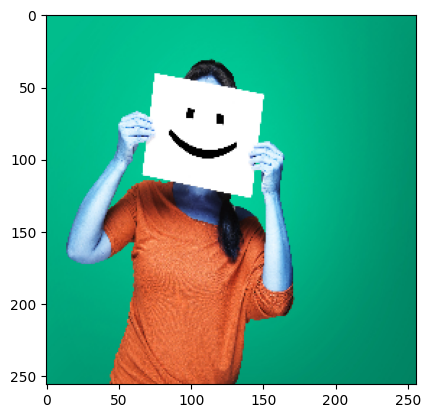

In [164]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [165]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 74ms/step


In [166]:
yhat

array([[7.503739e-08]], dtype=float32)

In [167]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
